In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ML_spotify_data.csv')

In [4]:
df.head()

,name,artists,popularity,danceability,valence,energy,explicit,key,liveness,loudness,speechiness,tempo
0,We're For The Dark - Remastered 2010,['Badfinger'],22,0.678,0.559,0.432,0,3,0.0727,-12.696,0.0334,117.674
1,Sixty Years On - Piano Demo,['Elton John'],25,0.456,0.259,0.368,0,6,0.1560,-10.692,0.0280,143.783
2,Got to Find Another Way,['The Guess Who'],21,0.433,0.833,0.724,0,0,0.1700,-9.803,0.0378,84.341
3,Feelin' Alright - Live At The Fillmore East/1970,['Joe Cocker'],22,0.436,0.870,0.914,0,5,0.8550,-6.955,0.0610,174.005
4,Caravan - Take 7,['Van Morrison'],23,0.669,0.564,0.412,0,7,0.4010,-13.095,0.0679,78.716


In [6]:
df.shape

(10000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          10000 non-null  object 
 1   artists       10000 non-null  object 
 2   popularity    10000 non-null  int64  
 3   danceability  10000 non-null  float64
 4   valence       10000 non-null  float64
 5   energy        10000 non-null  float64
 6   explicit      10000 non-null  int64  
 7   key           10000 non-null  int64  
 8   liveness      10000 non-null  float64
 9   loudness      10000 non-null  float64
 10  speechiness   10000 non-null  float64
 11  tempo         10000 non-null  float64
dtypes: float64(7), int64(3), object(2)
memory usage: 937.6+ KB


In [8]:
df.isnull().sum()

name            0
artists         0
popularity      0
danceability    0
valence         0
energy          0
explicit        0
key             0
liveness        0
loudness        0
speechiness     0
tempo           0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

np.int64(1)

In [10]:
#dropping duplicates
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

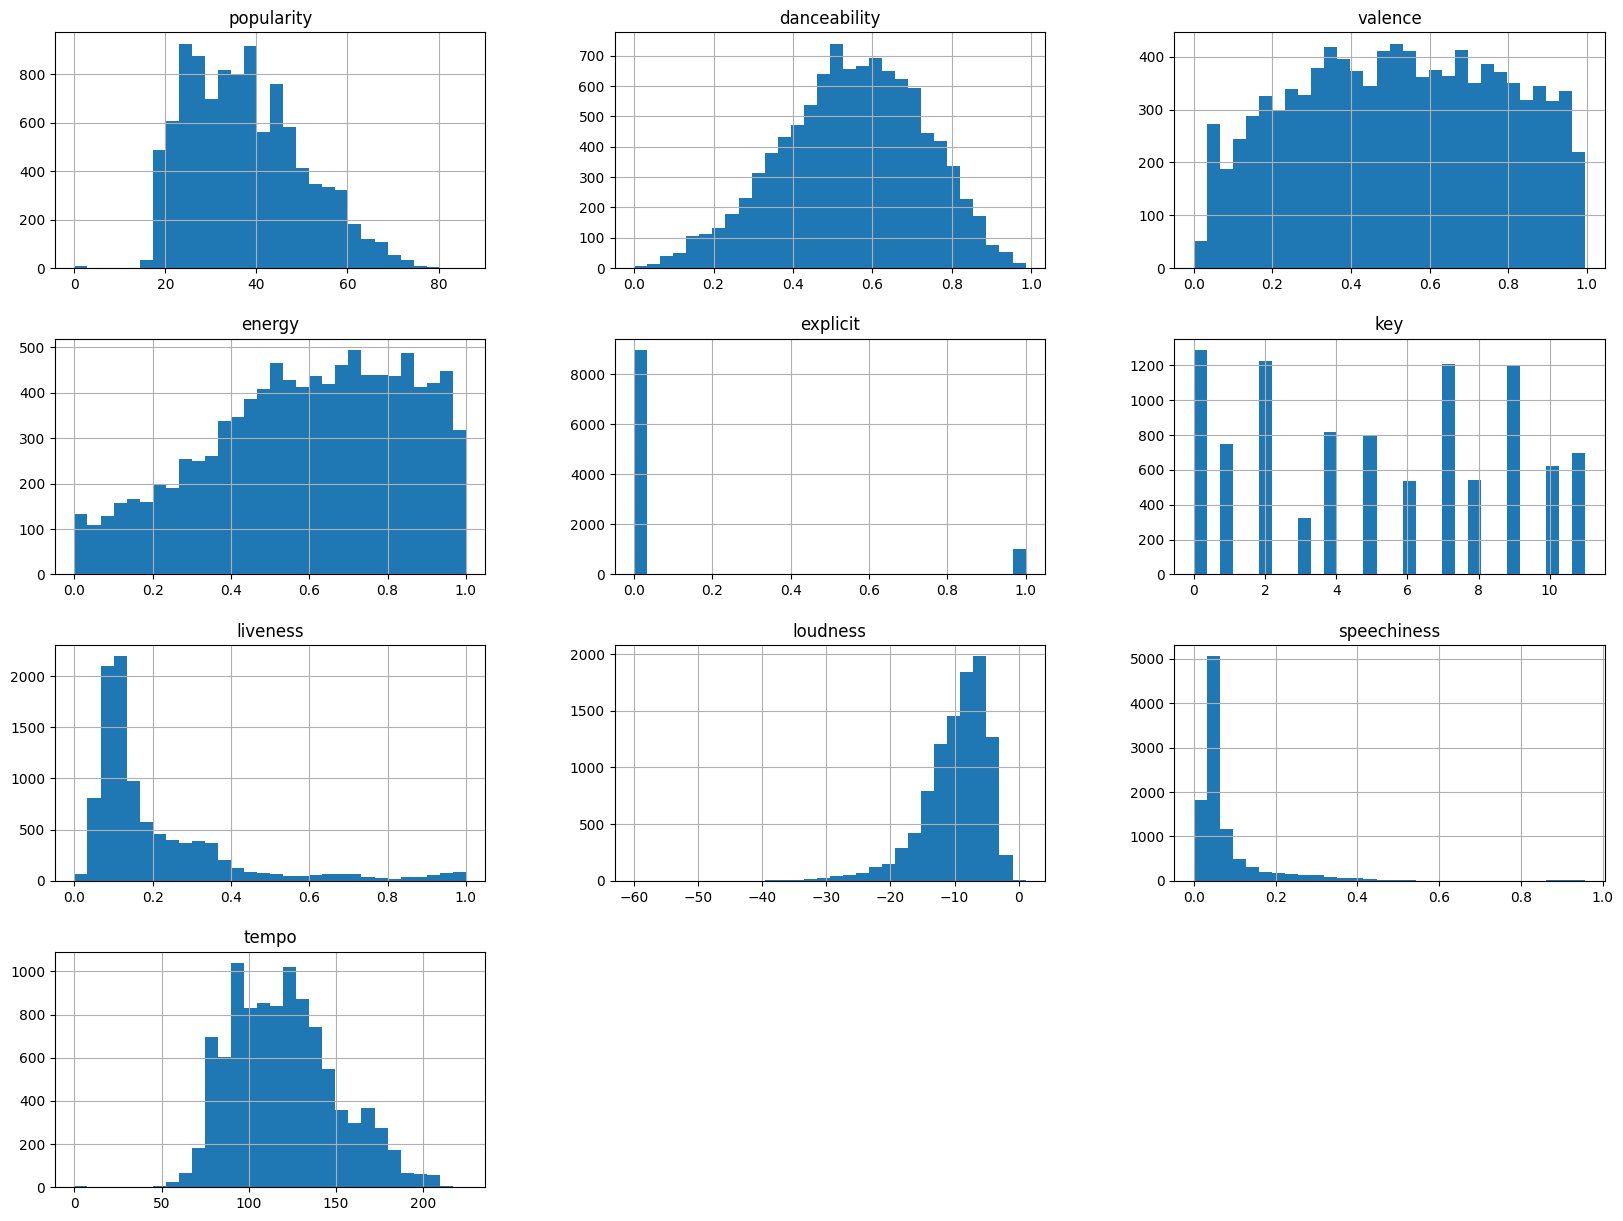

In [11]:
#feature distribution
df.hist(bins=30, figsize=(20,15))
plt.show()

In [ ]:
# relevant features
features = ['danceability', 'valence', 'energy', 'liveness', 'loudness', 'speechiness',
            'tempo', 'popularity', 'key']
# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

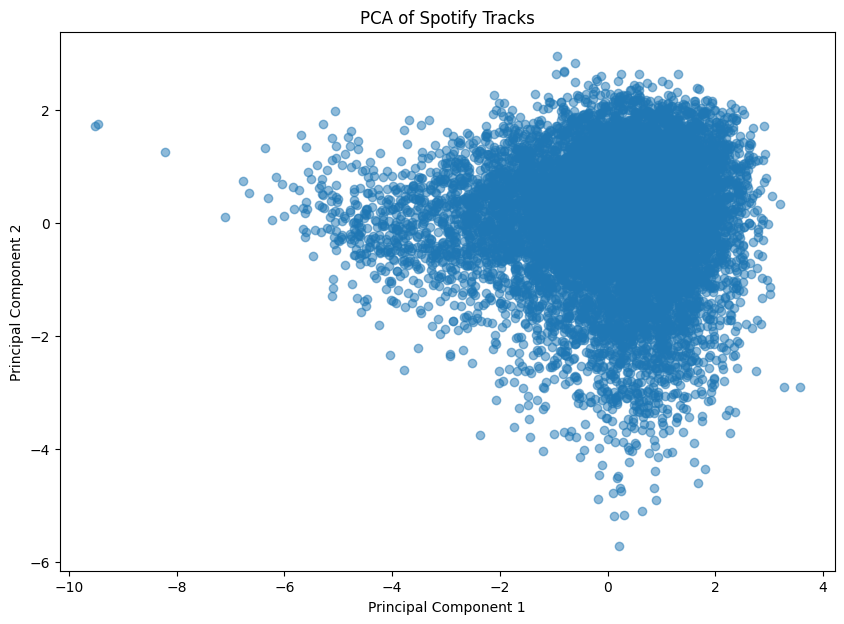

In [ ]:
# Dimensionality Reduction for Visualization
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

#visualize PCA result
plt.figure(figsize=(10, 7))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.title('PCA of Spotify Tracks')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

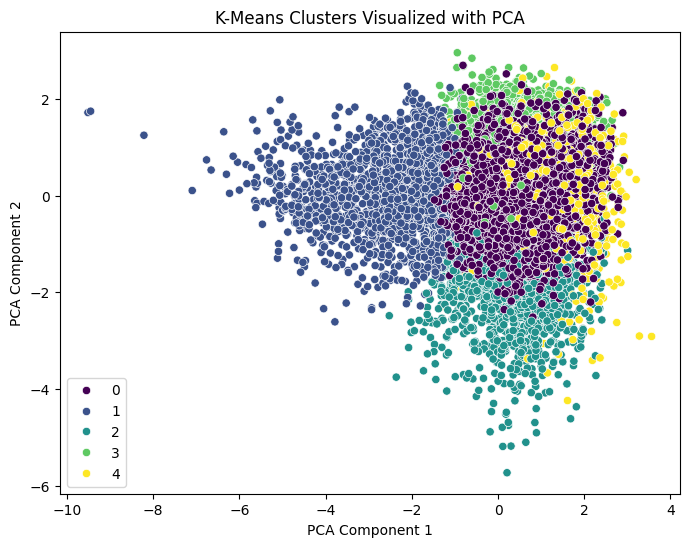

In [30]:
# PCA Visualization for K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters Visualized with PCA')
plt.show()

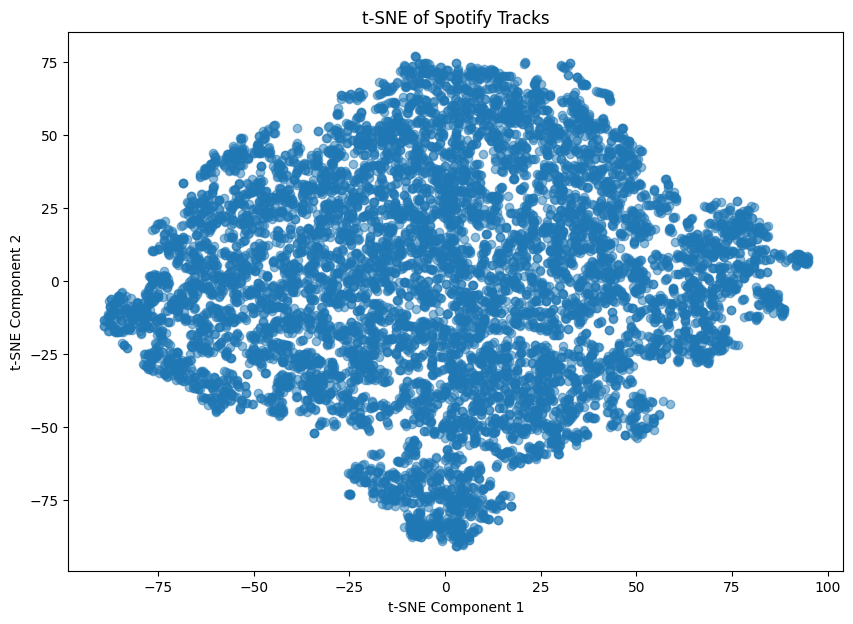

In [ ]:
# t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_features = tsne.fit_transform(scaled_features)
plt.figure(figsize=(10, 7))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], alpha=0.5)
plt.title('t-SNE of Spotify Tracks')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

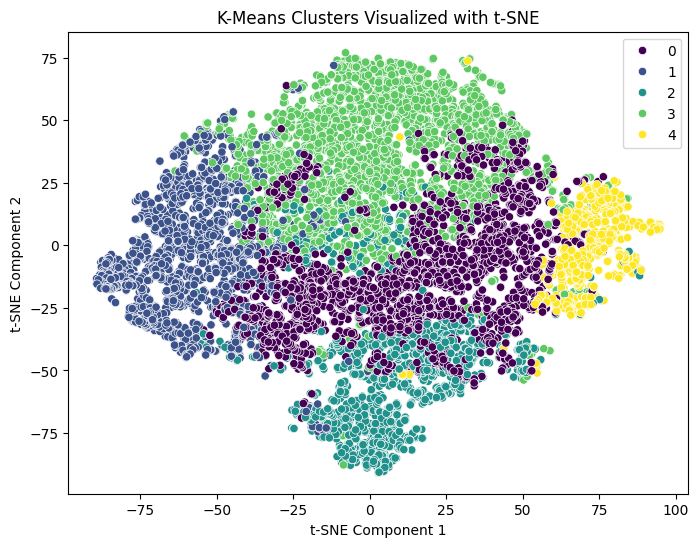

In [29]:
# t-SNE Visualization for K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], hue=kmeans_labels, palette='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clusters Visualized with t-SNE')
plt.show()

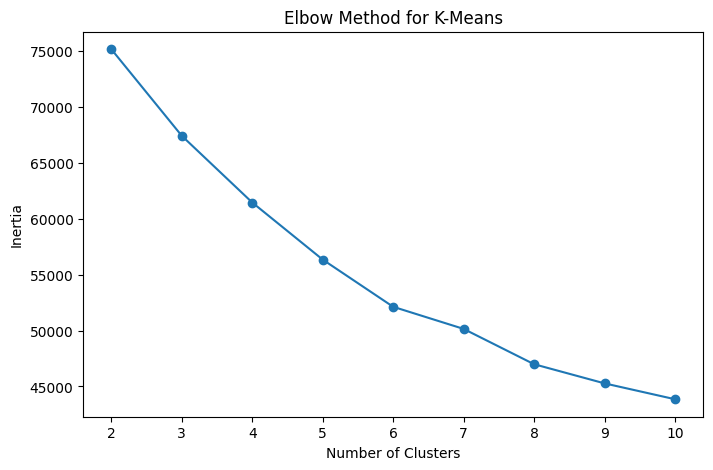

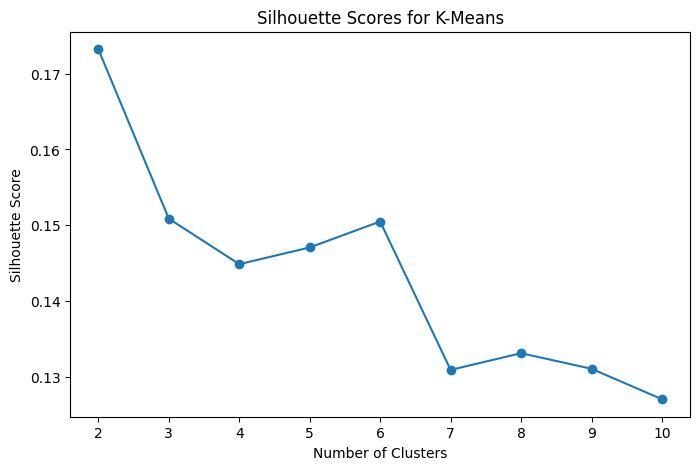

K-Means Silhouette Score (k=5): 0.1470879332593626


In [ ]:
# Elbow Method for K-Means
inertias = []
silhouette_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertias.append(km.inertia_)
    if k > 1:
        score = silhouette_score(scaled_features, km.labels_)
        silhouette_scores.append(score)

# Plotting Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means')
plt.show()

# Silhouette Score for K-Means model
print(f'K-Means Silhouette Score (k=5): {silhouette_score(scaled_features, kmeans_labels)}')

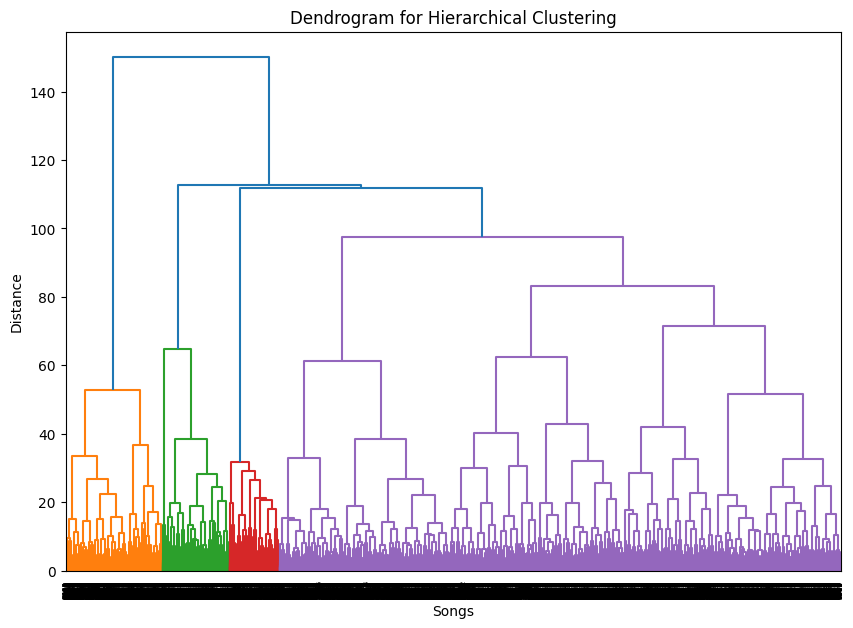

Hierarchical Clustering Silhouette Score: 0.0943669755449702


In [ ]:
# Hierarchical Clustering
linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Songs')
plt.ylabel('Distance')
plt.show()

hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_features)
print(f'Hierarchical Clustering Silhouette Score: {silhouette_score(scaled_features, hc_labels)}')

In [34]:
# DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=3)
dbscan_labels = dbscan.fit_predict(scaled_features)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'DBSCAN Number of Clusters: {n_clusters}, Noise Points: {list(dbscan_labels).count(-1)}')
if n_clusters > 1:
    print(f'DBSCAN Silhouette Score: {silhouette_score(scaled_features, dbscan_labels)}')


DBSCAN Number of Clusters: 111, Noise Points: 2800
DBSCAN Silhouette Score: -0.4286372032337303


In [ ]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(scaled_features)
print(f'GMM Silhouette Score: {silhouette_score(scaled_features, gmm_labels)}')

GMM Silhouette Score: 0.028216281862429488


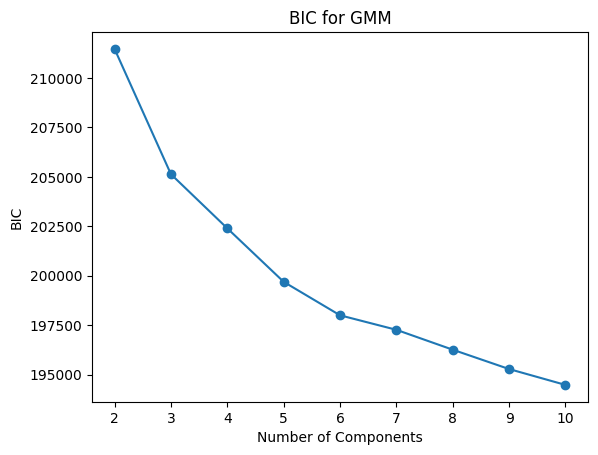

In [35]:
bics = [GaussianMixture(n_components=k, random_state=42).fit(scaled_features).bic(scaled_features) for k in range(2, 11)]
plt.plot(range(2, 11), bics, marker='o')
plt.title('BIC for GMM')
plt.xlabel('Number of Components')
plt.ylabel('BIC')
plt.show()

In [ ]:
# Cluster Analysis
df['kmeans_cluster'] = kmeans_labels
cluster_summary = df.groupby('kmeans_cluster')[features].mean()
print("\nK-Means Cluster Summary (Mean Feature Values):")
print(cluster_summary)


K-Means Cluster Summary (Mean Feature Values):
                danceability   valence    energy  liveness   loudness  \
kmeans_cluster                                                          
0                   0.583961  0.461356  0.687157  0.156963  -6.442417   
1                   0.402589  0.260884  0.240255  0.148687 -16.691147   
2                   0.403046  0.466885  0.789049  0.475859  -7.821699   
3                   0.648940  0.754716  0.618305  0.148545  -9.839171   
4                   0.704044  0.581883  0.656948  0.257667  -8.077658   

                speechiness       tempo  popularity       key  
kmeans_cluster                                                 
0                  0.064570  121.488253   49.819955  5.172168  
1                  0.042175  107.280433   34.367473  4.993824  
2                  0.077562  136.731776   31.716581  5.376607  
3                  0.055357  120.173373   30.486147  5.218428  
4                  0.366610  114.475721   43.790411  5.4

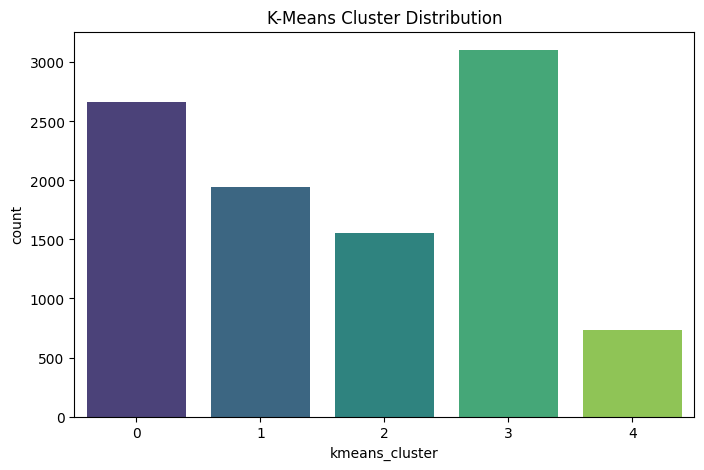

In [31]:
#cluster distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='kmeans_cluster', data=df, palette='viridis')
plt.title('K-Means Cluster Distribution')
plt.show()
